# Deep Neural Network for Image Classification: Application



In [1]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from dnn_app_utils import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)


##  Dataset



In [2]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

y = 0. It's a non-cat picture.


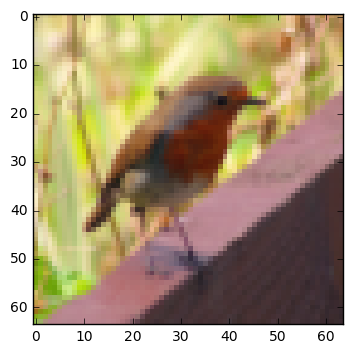

In [3]:

index = 10
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0, index]) + ". It's a " + classes[train_y[0, index]].decode("utf-8") + " picture.")

In [4]:

m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)



<img src="images/imvectorkiank.png" style="width:450px;height:300px;">


In [5]:

train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

train_x = train_x_flatten / 255.
test_x = test_x_flatten / 255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))


train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


##  Architecture of your model



### 2-layer neural network

<img src="images/2layerNN_kiank.png" style="width:650px;height:400px;">

###  L-layer deep neural network



<img src="images/LlayerNN_kiank.png" style="width:650px;height:400px;">


## Two-layer neural network

*LINEAR -> RELU -> LINEAR -> SIGMOID*

In [6]:

n_x = 12288    
n_h = 7
n_y = 1
layers_dims = (n_x, n_h, n_y)

In [7]:


def two_layer_model(X, Y, layers_dims, learning_rate=0.0075, num_iterations=3000, print_cost=False):
   
    np.random.seed(1)
    grads = {}
    costs = []                              
    m = X.shape[1]                           
    (n_x, n_h, n_y) = layers_dims
    
    parameters = initialize_parameters(n_x, n_h, n_y)
   
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
  

    for i in range(0, num_iterations):

        
        A1, cache1 = linear_activation_forward(X, W1, b1, 'relu')
        A2, cache2 = linear_activation_forward(A1, W2, b2, 'sigmoid')
       
        cost = compute_cost(A2, Y)
       
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, 'sigmoid')
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, 'relu')
        
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
       
        parameters = update_parameters(parameters, grads, learning_rate)
       
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
       
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 100 == 0:
            costs.append(cost)
       
   
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.693049735659989
Cost after iteration 100: 0.6464283150388817
Cost after iteration 200: 0.6325086257948581
Cost after iteration 300: 0.6014932097069347
Cost after iteration 400: 0.5601652326734954
Cost after iteration 500: 0.5157934975899229
Cost after iteration 600: 0.47590238832247345
Cost after iteration 700: 0.43858640997112314
Cost after iteration 800: 0.3910072887566946
Cost after iteration 900: 0.3584220494573506
Cost after iteration 1000: 0.34299735904004847
Cost after iteration 1100: 0.3101904235095467
Cost after iteration 1200: 0.273966132872609
Cost after iteration 1300: 0.2370347086950205
Cost after iteration 1400: 0.18734248651597438
Cost after iteration 1500: 0.16864009816415473
Cost after iteration 1600: 0.14197411005689567
Cost after iteration 1700: 0.11292363594102996
Cost after iteration 1800: 0.09758444844752405
Cost after iteration 1900: 0.08554699338649566
Cost after iteration 2000: 0.07593496617351737
Cost after iteration 2100: 0.067941362

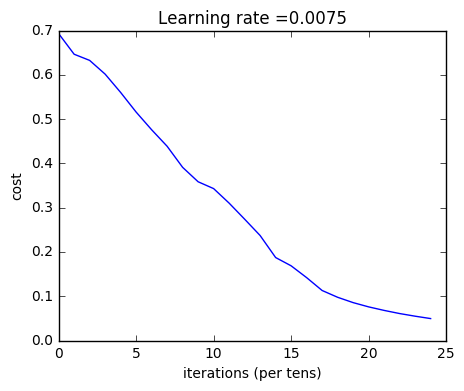

In [8]:
parameters = two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), num_iterations = 2500, print_cost=True)

In [9]:
predictions_train = predict(train_x, train_y, parameters)

Accuracy: 1.0


In [10]:
predictions_test = predict(test_x, test_y, parameters)

Accuracy: 0.72


## L-layer Neural Network

*[LINEAR -> RELU]$\times$(L-1) -> LINEAR -> SIGMOID*

In [11]:

layers_dims = [12288, 20, 7, 5, 1] #  5-layer model

In [12]:


def L_layer_model(X, Y, layers_dims, learning_rate=0.0075, num_iterations=3000, print_cost=False): #lr was 0.009
   

    np.random.seed(1)
    costs = []                        
   
    parameters = initialize_parameters_deep(layers_dims)
 
    for i in range(0, num_iterations):

      
        AL, caches = L_model_forward(X, parameters)
       
        cost = compute_cost(AL, Y)
       
        grads = L_model_backward(AL, Y, caches)
       
        parameters = update_parameters(parameters, grads, learning_rate)
        
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" % (i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
   
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.771749
Cost after iteration 100: 0.673350
Cost after iteration 200: 0.648247
Cost after iteration 300: 0.620384
Cost after iteration 400: 0.568401
Cost after iteration 500: 0.520754
Cost after iteration 600: 0.469203
Cost after iteration 700: 0.487263
Cost after iteration 800: 0.358436
Cost after iteration 900: 0.347641
Cost after iteration 1000: 0.291955
Cost after iteration 1100: 0.273223
Cost after iteration 1200: 0.229250
Cost after iteration 1300: 0.196667
Cost after iteration 1400: 0.176585
Cost after iteration 1500: 0.157727
Cost after iteration 1600: 0.142742
Cost after iteration 1700: 0.139015
Cost after iteration 1800: 0.123863
Cost after iteration 1900: 0.111514
Cost after iteration 2000: 0.105953
Cost after iteration 2100: 0.098199
Cost after iteration 2200: 0.094213
Cost after iteration 2300: 0.087161
Cost after iteration 2400: 0.082077


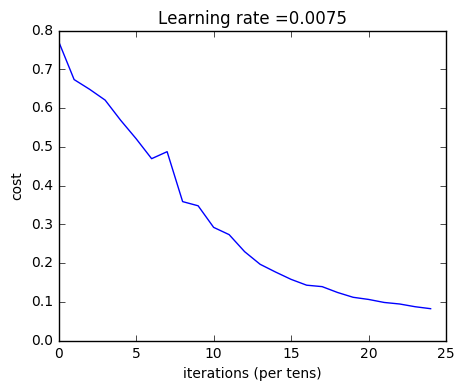

In [13]:
parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations=2500, print_cost=True)

In [14]:
pred_train = predict(train_x, train_y, parameters)

Accuracy: 1.0


In [15]:
pred_test = predict(test_x, test_y, parameters)

Accuracy: 0.84


##  Results Analysis


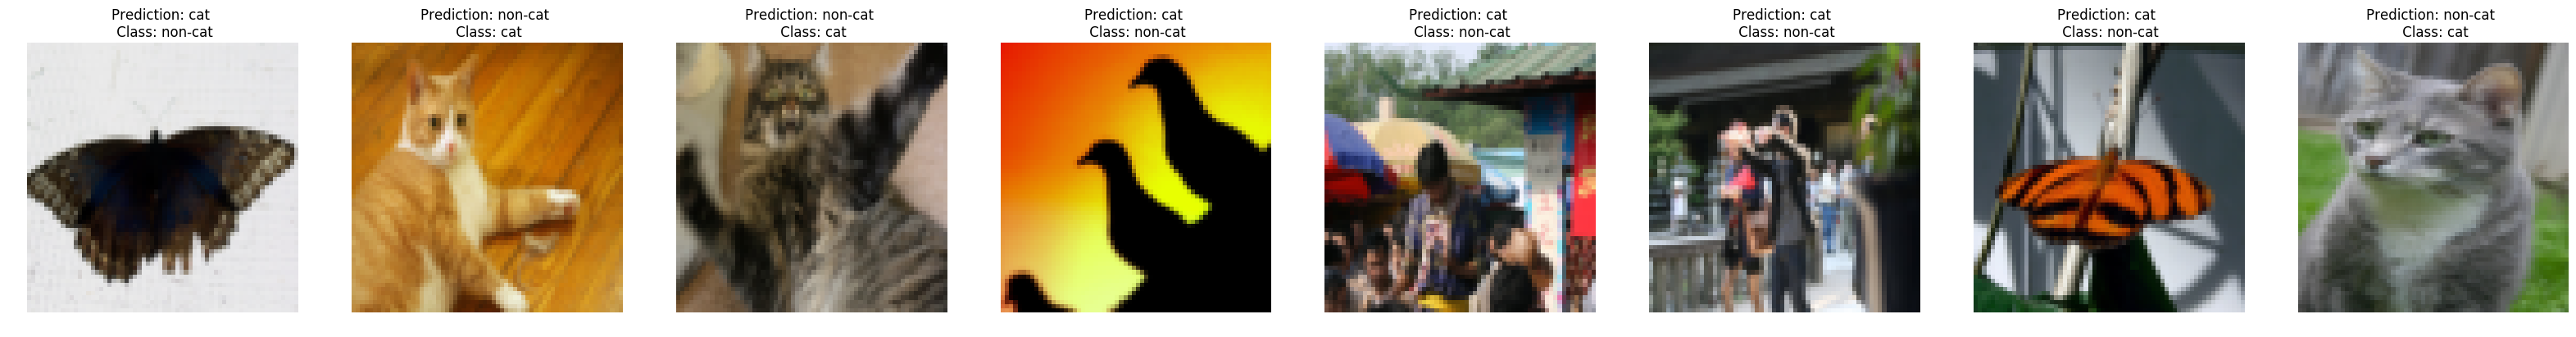

In [16]:
print_mislabeled_images(classes, test_x, test_y, pred_test)